### Training a XGBoost Regressor
In this step, I am going to train a XGBoost regressor using the pipeline described on One_hot_encoding.ipynb. XGBoost regressor is a boosting method using decision trees. First, I am going to one hot encode the features in the same manner as before like the other models. I am going to proceed with the same example as before.

In [38]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

#Loading the dataframe from the previous notebook
df = pd.read_csv('test.csv',index_col=0)

# Converting the string representation of the list to a list
df['Features'] = df['Features'].apply(lambda x: ast.literal_eval(x))
df

,Target,Features
Genes,,
Gene_1,1.717405,[TTCTCAAATACCCCTATTCTCAAATACCCCTATTCTCAAATATCC...
Gene_2,4.481926,[CCTCAATTCTCAAATACTCCTATTCTCAAATACCCCTAATCTCAA...
Gene_3,3.121352,[CAAATACCCTTTTATTCTCAAATACCTCTATTCTCTAATACCCAT...
Gene_4,0.739333,[AATACCCCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTC...
Gene_5,2.347276,[AATACCCCTATTCTCAAATACCCCTATTCTCTAATACCCCTATTC...
Gene_6,5.212245,[CCCCTATTCTCAAATACCCTTTTATTCTCAAATACCCCTATTCTC...
Gene_7,0.262397,[CCTCTATTCTCTAATACCCATTCTCAAATACCATTTTATTCTCAA...
Gene_8,1.883738,[TTCAAATACCCCTATTCTCTAATACCCTTATTCTCAAATACCCCT...
Gene_9,3.030171,[CTCAAATACTCCTATTCTCAAATACCCCTATTCTCAAATACCCTT...


In [39]:
# Functions from the other nothebook

def one_hot_encoding(features, all_features):
    one_hot = []
    for feature in all_features:
        if feature in features:
            one_hot.append(1)
        else:
            one_hot.append(0)
    return one_hot

def create_one_hot_encoding(df):

    '''
    This function takes a dataframe with a column named "Features" and creates a one hot encoding of the features.
    
    Parameters
    ----------
    df : pandas.DataFrame
    Dataframe with a column named "Features" that contains a list of features and a column named "Genes" that contains the gene names.
    Dataframe should also contain column called "Target" that contains the target.


        
    Returns
    ------- 
    df_one_hot : pandas.DataFrame
    Dataframe with one hot encoded features.
    
    '''
  
    #Preprocessing step

    # Making a list of all the features
    lists_of_features = df["Features"].values.flatten().tolist()

    # Nested list comprehension to create a single flattened list
    flattened_list = [item for sublist in lists_of_features for item in sublist]

    #making a set of the flattened lists features (removing duplicates)
    all_features = list(set(flattened_list))

    #  Creating one hot encoding dataframe keeping the same Gene names as index and the Target
    df_one_hot = pd.DataFrame(index=df.index)

    # Create columns names
    features_names = ["feature_" + str(i+1) for i in range(len(all_features))]

    # Add 100 columns with the names from the list to the DataFrame
    for col in features_names:
        df_one_hot[col] = ""

    # Adding one hot encoded features to the data frame
    for i,gene in enumerate(df.index):
        df_one_hot.loc[gene] = one_hot_encoding(df["Features"].values[i], all_features)

    #Adding the target from df
    df_one_hot.insert(0,"Target" , df["Target"])

    return df_one_hot

# Creating one hot encoding dataframe
lists_of_features = df["Features"].values.flatten().tolist()

# Nested list comprehension to create a single flattened list
flattened_list = [item for sublist in lists_of_features for item in sublist]

#making a set of the flattened lists features (removing duplicates)
all_features = list(set(flattened_list))

    #  Creating one hot encoding dataframe keeping the same Gene names as index and the Target
df_one_hot = pd.DataFrame(index=df.index)
df["Features"].values[0]

df_one_hot = create_one_hot_encoding(df)
display(df_one_hot)

,Target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70
Genes,,,,,,,,,,,,,,,,,,,,,
Gene_1,1.717405,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
Gene_2,4.481926,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Gene_3,3.121352,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gene_4,0.739333,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Gene_5,2.347276,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Gene_6,5.212245,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
Gene_7,0.262397,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gene_8,1.883738,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
Gene_9,3.030171,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


With the features and our target, we should be able to train a XGBoost Regressor. Before the training, like the other two models, I will make functions to perform cross-validation (CV) to evaluate our models. 

In [40]:
#Import CV Packages
from sklearn.model_selection import KFold

# RMSE function for two arrays
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

# Function that performs the cross validation
def run_cv(n_folds, model, X_train, y_train):
    """
    Args:
        n_folds (int) : how many folds of CV to do
        model (sklearn Model) : what model do we want to fit
        X_train (np.array) : feature matrix
        y_train (np.array) : target array
        
    Returns:
        a dictionary with scores from each fold for training and validation
            {'train' : [list of training scores],
             'val' : [list of validation scores]}
            - the length of each list = n_folds
    """
    
    folds = KFold(n_splits=n_folds).split(X_train, y_train)

    train_scores, val_scores = [], []
    for k, (train, val) in enumerate(folds):
        
        X_train_cv = X_train[train]
        y_train_cv = y_train[train]

        X_val_cv = X_train[val]
        y_val_cv = y_train[val]

        model.fit(X_train_cv, y_train_cv)

        y_train_cv_pred = model.predict(X_train_cv)
        y_val_cv_pred = model.predict(X_val_cv)

        train_acc = rmse(y_train_cv, y_train_cv_pred)
        val_acc = rmse(y_val_cv, y_val_cv_pred)

        train_scores.append(train_acc)
        val_scores.append(val_acc)

    print('%i Folds' % n_folds)
    print('Mean training rmse = %.3f +/- %.4f' % (np.mean(train_scores), np.std(train_scores)))
    print('Mean validation rmse = %.3f +/- %.4f' % (np.mean(val_scores), np.std(val_scores)))
    
    return {'train' : train_scores,
            'val' : val_scores}

Now, split into training and test set

In [41]:
#Importing Pachages
from sklearn.model_selection import train_test_split

#Make sure to install xgboost using pip install xgboost!!
from xgboost import XGBRegressor

# Splitting the dataset into the Training set and Test set
X = df_one_hot.iloc[:, 1:].values
y = df_one_hot.iloc[:, 0].values

# I will use 10% of the data for testing due to this being a small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Support Vector Regression Model
xgb = XGBRegressor(learning_rate=0.003, max_depth=5, n_estimators=1000, random_state=7)

n_folds = 8
x = run_cv(n_folds, xgb, X_train, y_train)

8 Folds
Mean training rmse = 0.362 +/- 0.0436
Mean validation rmse = 1.427 +/- 0.9199


Again, this is also not bad compared to the other three models! The validation RMSE is a bit worse but still a big standard deviation due to a dataset these small (10 samples) with these many features (~70 features).  More overfitted than the RF, but the **learning rate** and **n_estimators** hyperparameters can be tuned to deal with overfitting. 

We can use the built in function of XGBRegressor or use the permutation importances. Let's use both. First, the built in function.

Text(0, 0.5, 'Importance')

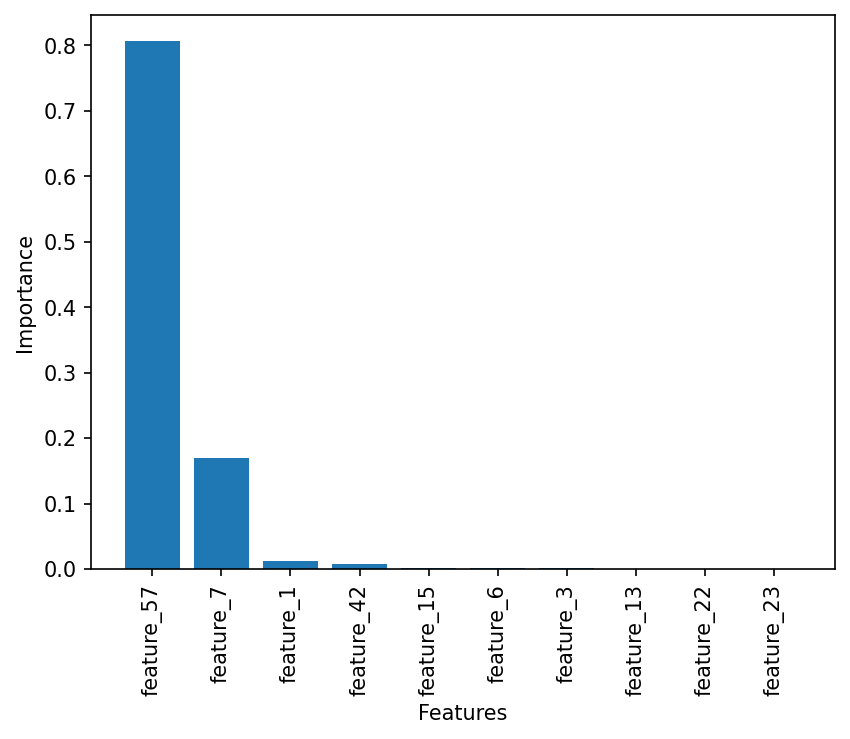

In [42]:
# Using the feature importance attribute of the random forest regressor to get the most important features

# Getting the feature importance
feature_importance = xgb.feature_importances_

# Sorting the feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Getting the names of the features
feature_names = df_one_hot.columns[1:]

fig = plt.figure(dpi = 150)

# Plotting the feature importance
plt.bar(feature_names[sorted_idx[:10]],feature_importance[sorted_idx[:10]])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')

The feature predicted to have more importance is **feature_57**. Let's try permutation importance.

In [43]:
#Importing package 
from sklearn.inspection import permutation_importance

# Splitting the training set into the Training validation set and Test validation sets
#X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1)
#svr.fit(X_train_train, y_train_train)

r = permutation_importance(estimator=xgb, X=X_train, y=y_train, n_repeats=500, random_state=7)

Like stated before, to make a more robust estimation of feature importance, **permutation importance** is used on a **subset** of the training set, as can be seen above! But for this examples it does not make much sense as we only have 10 samples.

Text(0, 0.5, 'Importance')

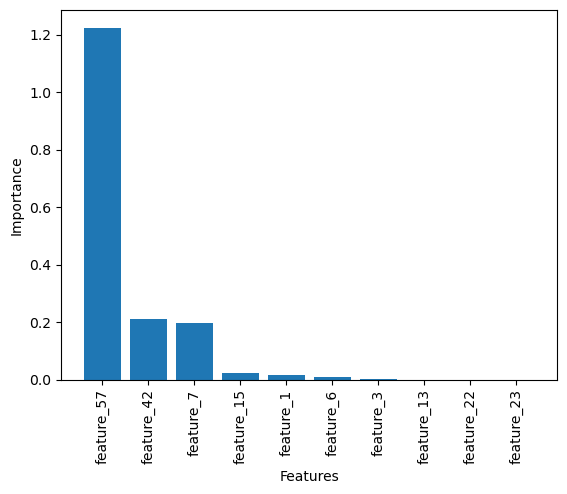

In [44]:
# Getting the names of the features
feature_names = df_one_hot.columns[1:]

# Getting the mean importances and sorted indexes   
mean_importances = r.importances_mean
sorted_idx = r.importances_mean.argsort()[::-1]

    
# Plotting the feature importance
plt.bar(feature_names[sorted_idx[:10]],mean_importances[sorted_idx[:10]])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')

One can see that, just like the built in function, **XGB Regressor** predicts that **feature 57**! This is a different from the ones predicted from the other models. I think if, with the real dataset, we get different feature importances, then we should compare them and maybe they are more similar than we think! Let's see the sequence.

In [45]:
# Determining the sequence attached to the most important feature

sequence = all_features[sorted_idx[0]]

print("The most important sequence predicted by random forest is: ", sequence)

The most important sequence predicted by random forest is:  CCCTTAACCCTTAACCCTTAACCCTTAACCCTTAACCCTTAACCCTAAAC


This is good! See Again, the first ~8kb, they are exactly the same as **features_40** and **features_9** that were predicted by RF and Ridge models, respectively! Thus, if this was our true dataset we could claim that the sequence **CCCTTAACCC** has some importance in predicting the phase target based on three models!

This is the main idea of these pipelines. The only thing left to do for these pipelines is to tune the hyperparameters to avoid overfitting, but we need the real dataset for this!